(14962, 6, 19)
Fold 1 - Training class distribution: 2.1495327102803756
Fold 1 - Testing class distribution: -1.6612072999532046
Fold 2 - Training class distribution: 0.24549918166939477
Fold 2 - Testing class distribution: -1.1932615816565288
Fold 3 - Training class distribution: -0.23386342376052482
Fold 3 - Testing class distribution: -0.6785212915301813
Fold 4 - Training class distribution: -0.34498889018828294
Fold 4 - Testing class distribution: 1.380439868975202
Fold 5 - Training class distribution: 0.0
Fold 5 - Testing class distribution: -0.959288722508191
Fold 6 - Training class distribution: -0.15984405458090123
Fold 6 - Testing class distribution: -1.2400561534861936


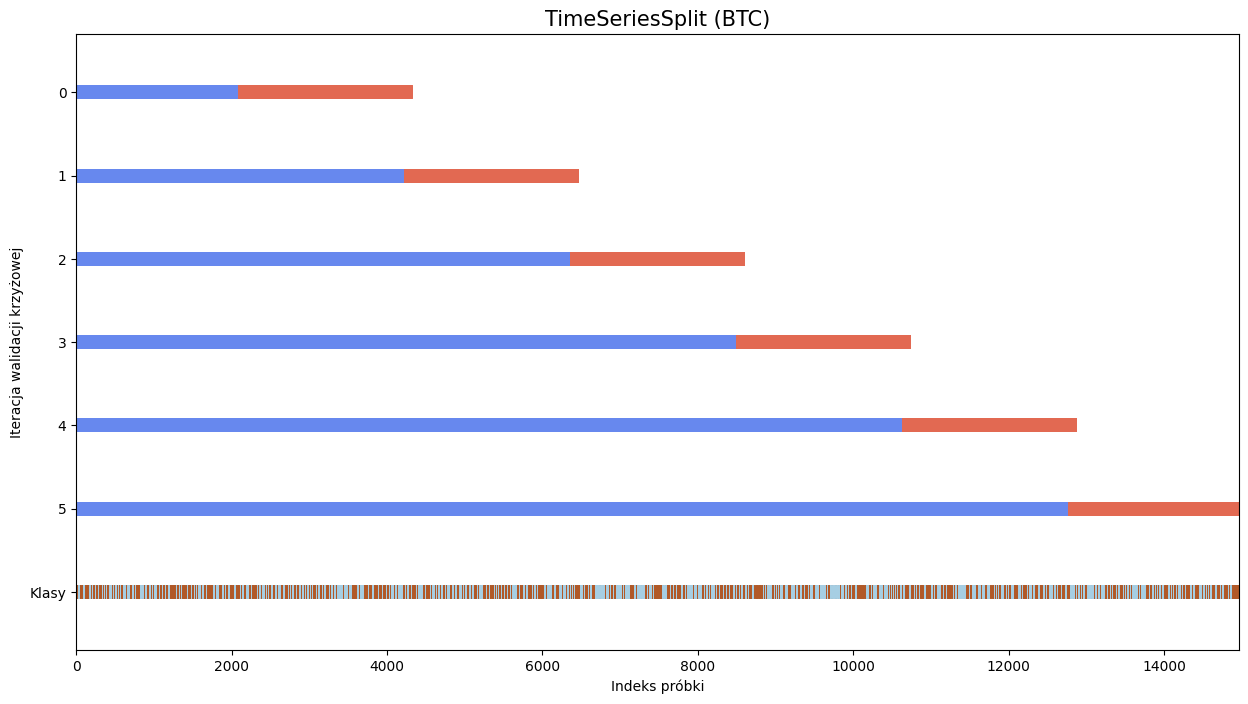

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import TimeSeriesSplit

X = X_train
y = Y_train

cmap_data = plt.cm.Paired
cmap_cv = plt.cm.coolwarm
n_splits = 6

def plot_cv_indices(cv, X, y, ax, n_splits, lw=10):

    for ii, (train_index, test_index) in enumerate(cv.split(X=X, y=y)):
        indices = np.array([np.nan] * len(X))
        indices[test_index] = 1
        indices[train_index] = 0

        ax.scatter(
            range(len(indices)),
            [ii + 0.5] * len(indices),
            c=indices,
            marker="_",
            lw=lw,
            cmap=cmap_cv,
            vmin=-0.2,
            vmax=1.2,
        )

        y_train, y_test = y[train_index], y[test_index]
        unique_train, counts_train = np.unique(y_train, return_counts=True)
        unique_test, counts_test = np.unique(y_test, return_counts=True)

        train_distribution = dict(zip(unique_train, counts_train))
        test_distribution = dict(zip(unique_test, counts_test))

        print(f"Fold {ii + 1} - Training class distribution: {((train_distribution[True] / (train_distribution[True] + train_distribution[False])) * 100) - 50}")
        print(f"Fold {ii + 1} - Testing class distribution: {((test_distribution[True] / (test_distribution[True] + test_distribution[False])) * 100) - 50}")

    ax.scatter(
        range(len(X)), [ii + 1.5] * len(X), c=y, marker="_", lw=lw, cmap=cmap_data
    )

    yticklabels = list(range(n_splits)) + ["Klasy"]
    ax.set(
        yticks=np.arange(n_splits + 1) + 0.5,
        yticklabels=yticklabels,
        xlabel="Indeks próbki",
        ylabel="Iteracja walidacji krzyżowej",
        ylim=[n_splits + 1.2, -0.2],
        xlim=[0, len(X)],
    )
    ax.set_title("{}".format('TimeSeriesSplit (BTC)'), fontsize=15)
    return ax

fig, ax = plt.subplots(figsize=(15, 8))
cv = TimeSeriesSplit(n_splits)
plot_cv_indices(cv, X, y, ax, n_splits)

plt.show()